In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

df = pd.read_excel(r'D:\Pycharm\project\pH experiment.xlsx',
                   sheet_name='rela cutoff 5%' , usecols=range(0,11)).dropna(how="all") 
original_name = list(df.columns[1:])
new_name = ["a","b","c","d","e","f","g","h","i","j"]
#"day 0", "day 20", 'day 32', 'day 44', 'day 0', 'day 20', 'day 32', 'day 44', 'day 0', 'day 20'
df.rename(columns=dict(zip(original_name, new_name)), inplace=True)
print(df.head()) 

                 Genus          a          b          c          d          e  \
0         Phormidium_A  48.145446  67.189702  34.080740  56.293995  48.145446   
1     Wenzhouxiangella   2.493781   5.664197   0.684557   0.199768   2.493781   
2        Cyclonatronum   5.533499   5.346210  22.045558  24.317074   5.533499   
3  Opitutaceae_UBA6669  11.569884   1.699546  15.943618   3.919302  11.569884   
4   Roseinatronobacter  13.790739   1.562735   2.868603   0.537450  13.790739   

           f          g          h          i          j  
0  78.313436  50.703443  48.248399  31.884698  21.801544  
1   1.104356   3.998746  25.681542   0.780156  61.904714  
2  18.430667  27.040006  17.200815   1.481230   7.211201  
3   0.000000   0.000000   0.000000   4.788633   0.000000  
4   0.437381   0.188911   0.000000  21.638182   2.992810  


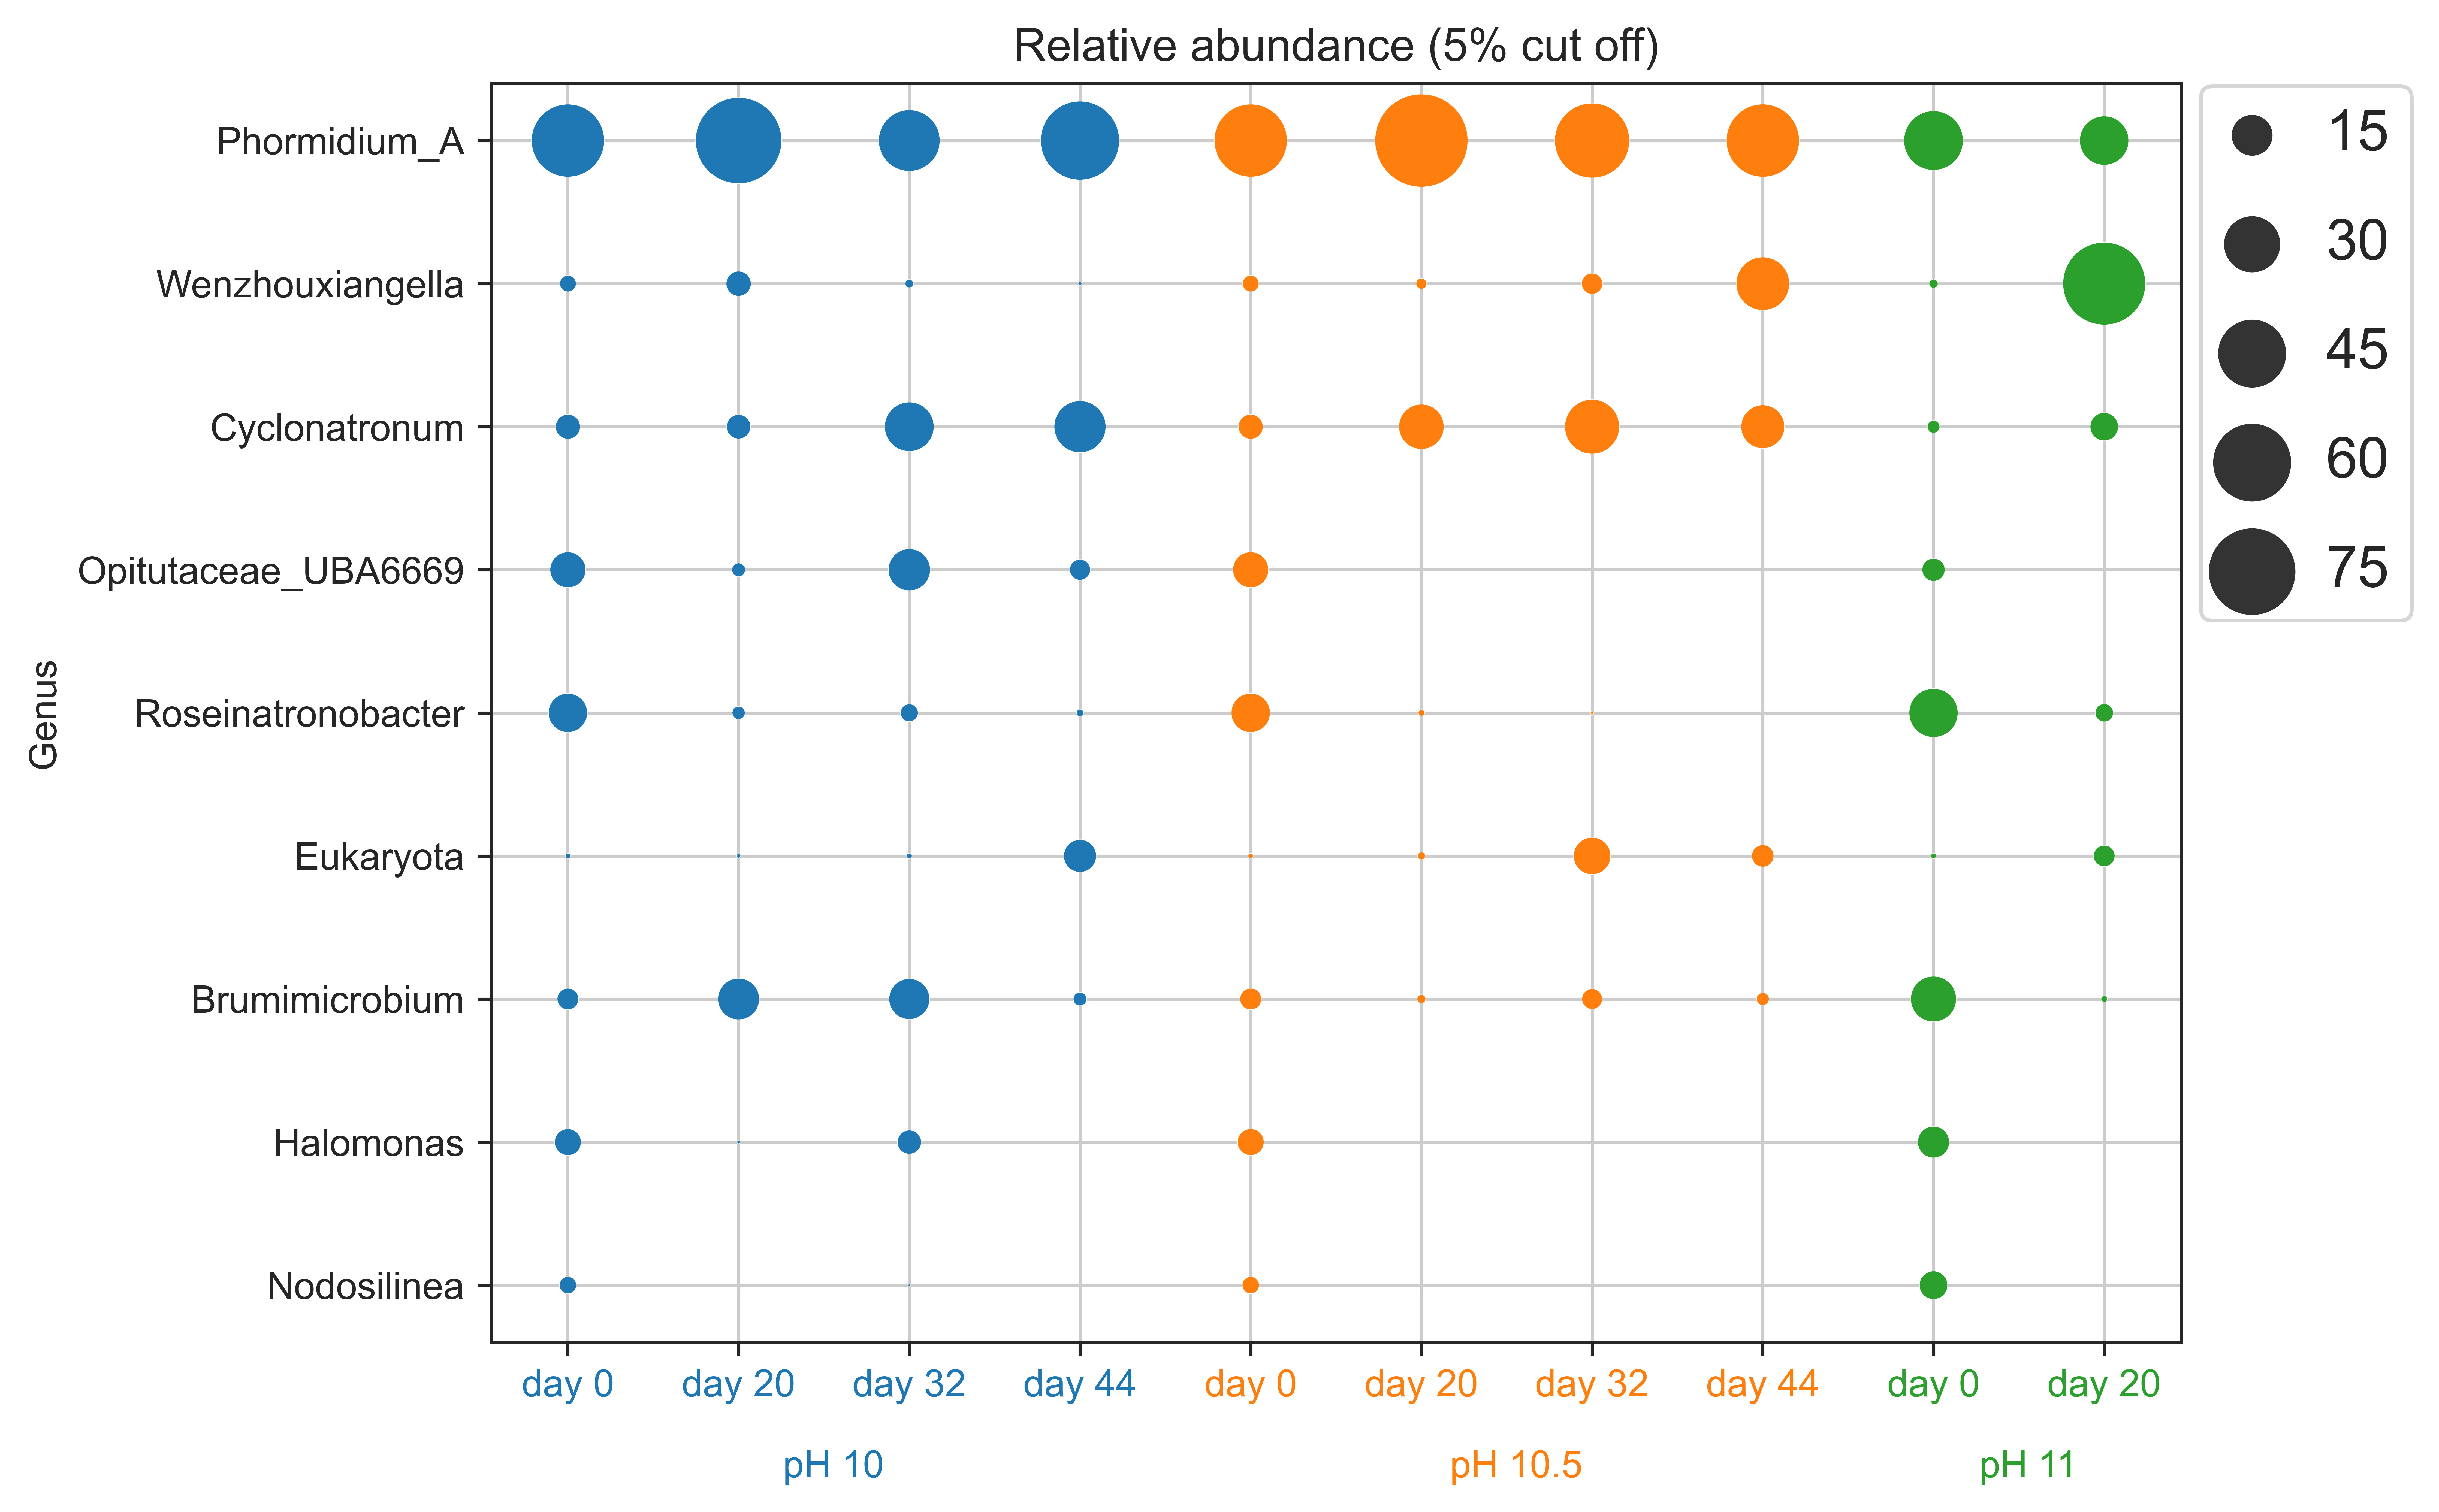

In [4]:
df_melted = pd.melt(df, id_vars=['Genus'], var_name="t")
new_name_2 = ["pH 10"] * 4 + ["pH 10.5"] * 4 + ["pH 11"] * 2
t_day = dict(zip(new_name, new_name_2))
df_melted['Group'] = [t_day[x] for x in df_melted['t']]
new_name_2 = ["day 0\npH 10", "day 20\npH 10", 'day 32\npH 10', 'day 44\npH 10', 'day 0\npH 10.5', 'day 20\npH 10.5', 'day 32\npH 10.5', 'day 44\npH 10.5', 'day 0\npH 11', 'day 20\npH 11']
new_name_2 = ["day 0", "day 20\n\n                  pH 10", 'day 32', 'day 44', 'day 0', 'day 20\n\n                  pH 10.5', 'day 32', 'day 44', 'day 0\n\n                  pH 11', 'day 20']
t_day = dict(zip(new_name, new_name_2))
df_melted['tt'] = [t_day[x] for x in df_melted['t']]
df_melted['value'] = [None if x == 0 else x for x in df_melted['value']]

plt.figure(figsize=(8,6), dpi=1000)
plt.grid(True)
ax = sns.scatterplot(data=df_melted, x='t', y='Genus', size='value', sizes=(0,500))  
ax.legend(bbox_to_anchor=(0.995, 1.02), loc=2, labelspacing=1, handlelength=1, fontsize=15)
ax = sns.scatterplot(data=df_melted, x='t', y='Genus', size='value', hue='Group',sizes=(0,600), legend=False)
sns.set_style('ticks')

plt.title('Relative abundance (5% cut off)')
plt.xlabel("")
xtick_labels = ax.get_xticklabels()
colors = ["#1F77B4"] * 4 +  ["#FF7F0E"] * 4 + ["#2CA02C"] * 2 # List of colors for each xtick label
for i in range(len(xtick_labels)):
    xtick_labels[i].set_color(colors[i]) # Set the color for each xtick label

xticks = plt.xticks()[0]
# set the new xtick labels
plt.xticks(xticks, new_name_2)
plt.savefig(r'D:\Pycharm\project\results\bubble_relative_abundance_5%_cutoff.png', bbox_inches='tight')